# Lab 2 - Univariate Linear Discrete-time Deterministic (ULDD) models

Author: Irena Papst and Elizabeth O'Meara

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Long-term Behaviour of the Geometric Growth Model

In lecture, you began analyzing the geometric growth model as defined in the following equation:

$$
P_{N + 1} = r P_N + m 
$$

Where $r$ is the per capita reproduction rate ($r > 0$) and $m$ is a constant migration rate that can be either positive or negative. You also found the fixed point (where $P_{N + 1} = P_N$), $P^* = \frac{m}{1 - r}$. In this model, there are 6 parameter cases:

1. $m > 0$ and $r < 1$
2. $m < 0$ and $r > 1$
3. $m \geq 0$ and $r > 1$
4. $m < 0$ and $r < 1$
5. $m = 0$ and $r = 1$
6. $m \neq 0$ and $r = 1$

In each of these cases, there will be different long term model behaviours. You have already analyzed the cases 1 and 2 in class, where $P^* > 0$ so that it is biologically relevant.

-----

**Exercise 1**: I will split you into 5 breakout rooms. Each group will be assigned a different range of parameters. As a group, do the following:

1. Use cobwebbing to determine **long-term model behaviour** as it relates to the population
2. Tie back the long-term behaviour to **parameter interpretation**

Once complete, we will take it up and fill in the table below.

|   Parameter Values  | Long-term Model Behaviour | Parameter Interpretation |
|:-------------------:|:-------------------------:|:------------------------:|
| $m > 0$, $r < 1$    | Pop decreases to a fixed point          | Immigration & Pop decay  |
| $m < 0$, $r > 1$    | Pop grows w/out bound     | Emmigration & growth     |
| $m \geq 0$, $r > 1$ | Pop grows w/out bound     | Immigration & growth     |
| $m < 0$, $r < 1$    | Pop goes extinct          | Emmigration & Pop decay  |
| $m = 0$ , $r = 1$   | Every point is an <br> equilibrium  | Perfect one-for-one replacement                         |
| $m > 0$, $r = 1$    | Pop grows w/out bound     | Immigration & one-for-one replacement                         |
| $m < 0$, $r = 1$    | Pop goes extinct          | Emmigration & one-for-one replacement                         |

![Answer 3](Lab2answer3.png)

![Answer 2](Lab2answer2.png)


![Answer 1](Lab2answer1.png)

-----

## Using Python to Simulate a Solution Trajectory

Although cobwebbing gives us an idea of the long-term model behviour, we do not know what a solution of this model looks like. We can either find an analytic solution, or we can simply use python to simulate a solution trajectory for a specific set of parameters.

In last week's Lab, I introduced for loops as a tool for performing recursive calculations that can simulate solutions to a model. We will use the same methods to simulate a solution to the geometric growth model. However, since there are 7 different scenarios for which we will want to simulate a solution trajectory, copying and pasting the same code over and over, just changing a couple parameters isn't the best idea. For example, if you realize that you have an error in the code, or that there is a better way to do something, you will have to go back and change each of the copies of the code. It is better practice to instead define a function that takes arguments for the parameters that change, and outputs what you want.

The following is an example of a function called `introduce` that takes the arguement `name` and outputs a string that says "My name is `name`". It's always a good idea to name your function with descriptive verbs, so that you can easily remember what it's supposed to do.

In [2]:
def introduce(name):
    print("My name is " + name)

introduce(name = "Elizabeth")

My name is Elizabeth


When defining functions, you start with the keyword `def` as shown, followed by the name of your function with parentheses. Within the parentheses is where you can include any function arguments (variables or parameters you may want to vary). Similar to for loops, you must include a colon before writing the code that the function executes. Then on the next line you begin the code that you want the function to run. In the example above that is `print("My name is " + name)`. (Code within a function definition must be on indented lines.) 

To call a function you simply use the function name followed by parentheses with any arguements you need. If your function does not have a default value for each argumement and you try to execute the function while ommitting an arguement you will get an error. See below.

In [3]:
my_name()

NameError: name 'my_name' is not defined

If you want to include a default value for arguements to prevent this error, you can do so in the following way:

In [4]:
def introduce(name = "Elizabeth"):
    print("My name is " + name)

introduce()
introduce(name = "Emily")

My name is Elizabeth
My name is Emily


You can have as many arguements as necessary within the function simply by separating them by a comma. For example:

In [5]:
def introduce_fully(first = "Elizabeth", last = "O'Meara"):
    print("My name is " + first + " " + last)
    
introduce_fully()
introduce_fully(first = "Emily", last = "Smith")

My name is Elizabeth O'Meara
My name is Emily Smith


You can also have a function return a value that you can assign to a variable. For example, the following function takes the arguement `x` and returns the value of `x*3`.

In [6]:
def triple(x):
    y = x*3
    return y

z = triple(x = 4)
print(z)

12


When defining functions, try to follow the same naming conventions as in naming variables, ie. short, descriptive names.

**Exercise 2**: Create a function that simulates the geometric growth model **using the model equation**. Your function should take the arguments $P_0$, $r$, $m$, and a total number of time steps $T$ (not counting $N = 0$). 

Make sure the output of your function is a vector containing $P_N$ for each simulated time $N$. Not only is this good practice for writing functions, but it will also help you with your homework for the week. 

*Confidence check*: with $m=10$, $r=0.5$, $P_0=1000$, you should calculate $P_{10} = 20.95703125$.

In [7]:
def geom_growth(m=10, r=0.5, P0=1000, T=10):
    tvec = np.arange(T + 1)
    P = np.zeros(T + 1)
    P[0] = P0
    
    for t in tvec[:T]:
        P[t + 1] = r*P[t] + m
    
    return P
P = geom_growth()
print(P)

[1000.          510.          265.          142.5          81.25
   50.625        35.3125       27.65625      23.828125     21.9140625
   20.95703125]


**Exercise 3**: Using the function you created in exercise 2, plot a solution trajectory for your assigned parameter range from exercise 1. Is the simulation consistent with your earlier cobwebbing results?

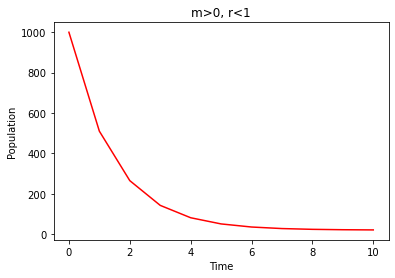

In [8]:
T = 10
tvec = np.arange(T + 1)
case_1 = geom_growth()
case_2 = geom_growth(m=-10, r=1.5)
case_3 = geom_growth(m=0, r=1.5)
case_4 = geom_growth(m=-10)
case_5 = geom_growth(m=0, r=1)
case_6 = geom_growth(r=1)
case_7 = geom_growth(m=-10, r=1)

plt.plot(tvec, case_1, c="red")
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('m>0, r<1');

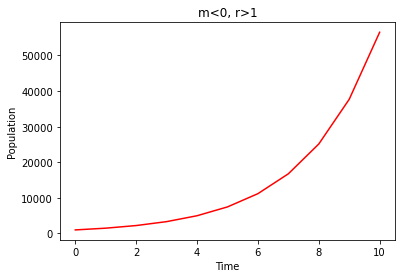

In [9]:
plt.plot(tvec, case_2, c="red")
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('m<0, r>1');

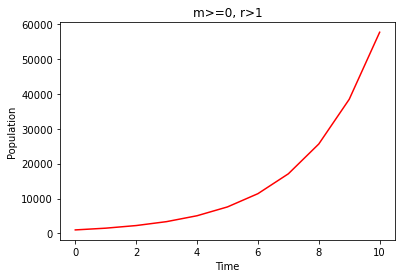

In [10]:
plt.plot(tvec, case_3, c="red")
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('m>=0, r>1');

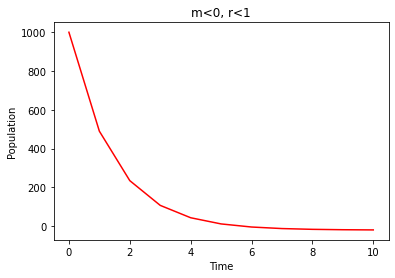

In [11]:
plt.plot(tvec, case_4, c="red")
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('m<0, r<1');

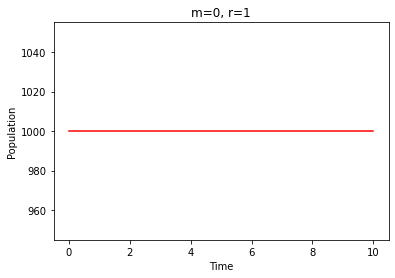

In [12]:
plt.plot(tvec, case_5, c="red")
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('m=0, r=1');

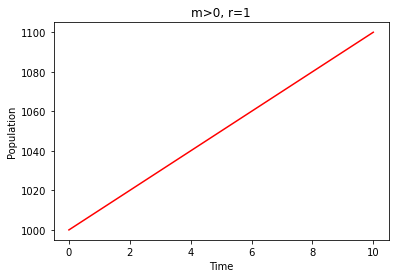

In [13]:
plt.plot(tvec, case_6, c="red")
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('m>0, r=1');

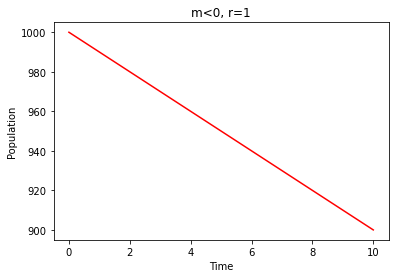

In [14]:
plt.plot(tvec, case_7, c="red")
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('m<0, r=1');